# Unsupervised machine learning

# K-Means

!["kmeans_1"](imgs/kmeans_1.png)

1. `intialize random centes`, and see what the `nearest neighbors points` to centers.
2. `update centers` with average distance between neighbors points and see `again what the nearest neighbors points` to centers.
3. update centers again untill no neighbors points moved from cluster to cluster and not updated centers again, finished.

![kmeans_2](imgs/kmeans_2.png)

+ Problem!
- intialize random points affect on clustering!

!["Kmeans"](imgs/kmeans_3.png)

we see that 3 clusters are not good because of initalize two random points nearest to each other.

- Solution: `K-means ++`

- initalize first point as random point.
- probability for all points which take as next center point based on
    - The `furthest` point is with `highest probability`.
    - The `nearest` point is with `lowest probability`.
- then K-means initalize center points are farther away from each other.

Coding: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

+ Parameters:
    - n_clusters :int, default=8
        - The number of clusters to form as well as the number of centroids to generate.

    - init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
        - Method for initialization center points:
    
    - n_init : ‘auto’ or int, default=10
        - Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia

    - max_iter : int, default=300
        - number of iterations for update center points
        - Maximum number of iterations of the k-means algorithm for a single run.

    - tol : float, default= 1e-4 (1 * 10 power -4)
        - stop when changing of initialize center of points is with 1e-4 (1 * 10 power -4).
        - Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

+ Methods

+ fit(X[, y, sample_weight])
    - run kmeans and know location of centers points.
    - Compute k-means clustering.

+ fit_predict(X[, y, sample_weight])
    - Compute cluster centers and predict cluster index for each sample.
    - return cluster index for each point in the cluster.

+ fit_transform(X[, y, sample_weight])
    - Compute clustering and transform X to cluster-distance space.

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
test = np.array([1,2,2,4,5,7])
test

array([1, 2, 2, 4, 5, 7])

In [6]:
test = test.reshape(-1,1)
test

array([[1],
       [2],
       [2],
       [4],
       [5],
       [7]])

In [7]:
cls = KMeans(n_clusters=2)

In [8]:
cls.fit_predict(test)

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 0, 0, 0])

In [9]:
df = pd.read_csv(r"Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.drop('CustomerID', axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
df['Genre'] = encoder.fit_transform(df['Genre'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
import seaborn as sns

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


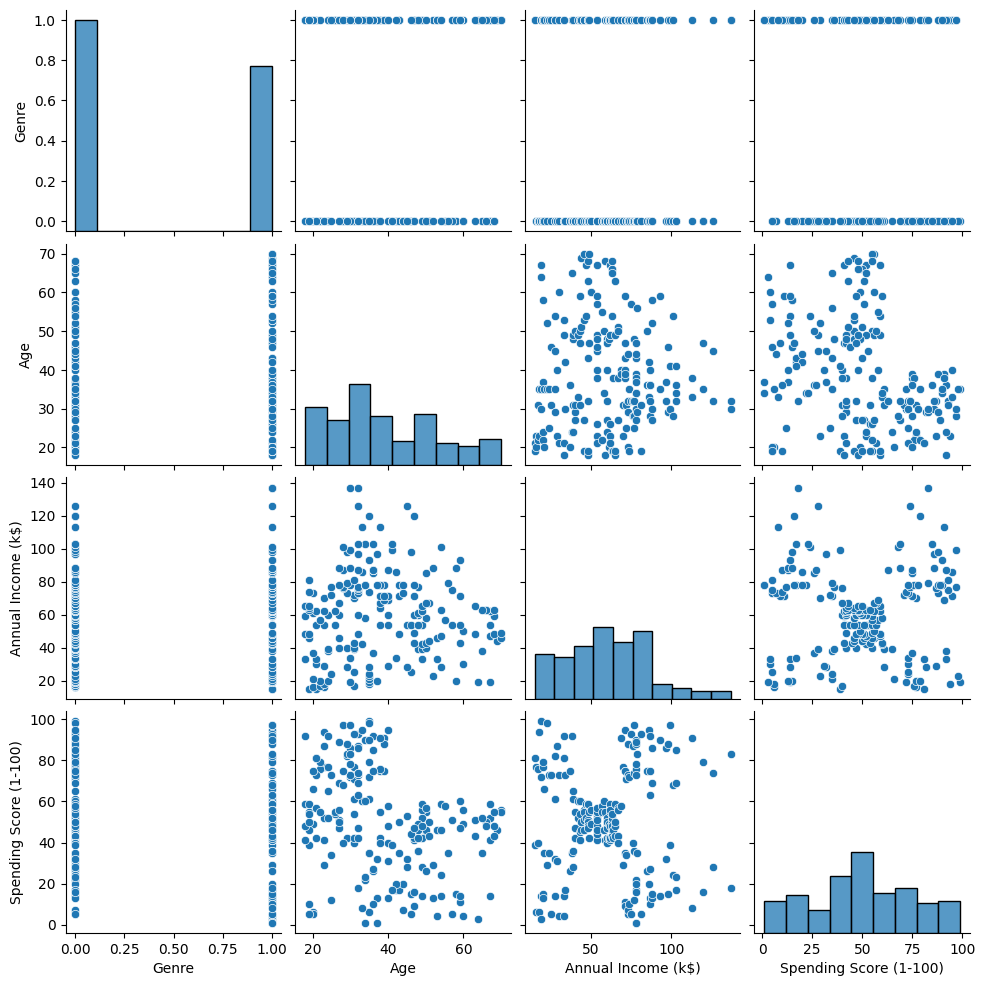

In [17]:
sns.pairplot(df)

we see that `Annual Income (k$)` and `Spending Score (1-100)` are the best relationship show that we have `5 Clusters`

USe Kmeans with `two features`

In [18]:
cls = KMeans(n_clusters=5)

we pass all data for kmeans without splitting

In [19]:
preds = cls.fit_predict(df)
preds

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [20]:
import matplotlib.pyplot as plt

we plot `Annual Income (k$)` with `Spending Score (1-100)`

In [27]:
df.iloc[:,2] # all rows and col Annual income

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

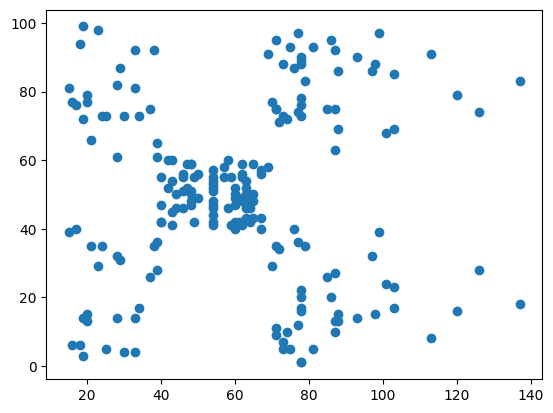

In [28]:
plt.scatter(df.iloc[:,2], df.iloc[:,3])

color clusters with plot `Annual Income (k$)` with `Spending Score (1-100)`

In [29]:
df.iloc[preds == 0, 2] # only rows with cluster 0 and col Annual income

0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

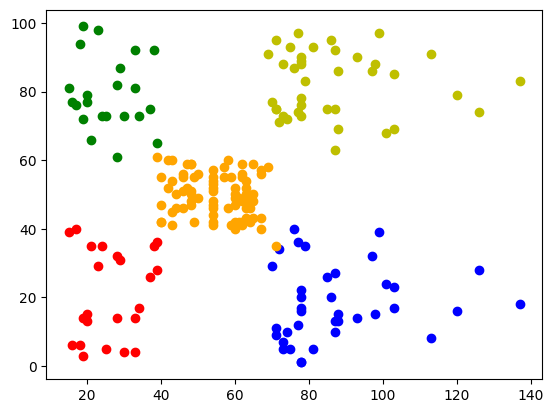

In [30]:
plt.scatter(df.iloc[preds == 0, 2], df.iloc[preds == 0, 3], color='r')
plt.scatter(df.iloc[preds == 1, 2], df.iloc[preds == 1, 3], color='y')
plt.scatter(df.iloc[preds == 2, 2], df.iloc[preds == 2, 3], color='b')
plt.scatter(df.iloc[preds == 3, 2], df.iloc[preds == 3, 3], color='g')
plt.scatter(df.iloc[preds == 4, 2], df.iloc[preds == 4, 3], color='orange')

# Agglomerative Clustering
+ algorithm is an example of `hierarchical clustering`.

!["Agglomerative_1](imgs/Agglomerative_1.png)

1. every point as cluster
2. Build proximaity matrix and rank cluster, diagonal is zeros, and other points are distance between two clusters.
3. get distance between the nearest two cluster.

!["Agglomerative_2"](imgs/Agglomerative_2.png)

we see that distance between two clusters are with min, max, center or group average.

!["Agglomerative_3"](imgs/Agglomerative_3.png)

4. `replace` distance between the nearest two cluster (`cluster_2`, `cluster_3`) with new cluster (`cluster_2_and_3`) created from (min, max, center or average distance) between `old two cluster`.
5. now we have cluster 1, 2_and_3, 4, 5 and 6.
6. repeat step 4 again until `merge all clusters` together in `one cluster`.

Coding: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

+ Parameters:
    - `linkage`{‘ward’, ‘complete’, ‘average’, ‘single’}, `default=’ward’`
        - Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

        - `‘ward’` `minimizes the variance` of the clusters being `merged`.

        - `‘average’` uses the `average` of the distances of each observation of the two sets.

        - `‘complete’` or `‘maximum’` linkage uses the maximum `distances` between all observations of the two sets.

        - `‘single’` uses the `minimum` of the `distances` between all observations of the two sets.

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
agg = AgglomerativeClustering(n_clusters=5)

In [33]:
preds = agg.fit_predict(df)
preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

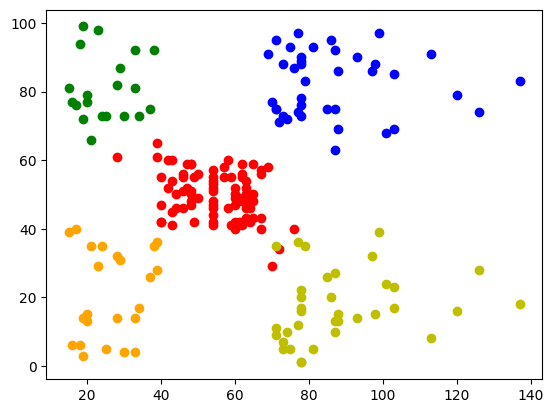

In [35]:
plt.scatter(df.iloc[preds == 0, 2], df.iloc[preds == 0, 3], color='r')
plt.scatter(df.iloc[preds == 1, 2], df.iloc[preds == 1, 3], color='y')
plt.scatter(df.iloc[preds == 2, 2], df.iloc[preds == 2, 3], color='b')
plt.scatter(df.iloc[preds == 3, 2], df.iloc[preds == 3, 3], color='g')
plt.scatter(df.iloc[preds == 4, 2], df.iloc[preds == 4, 3], color='orange')

we have important question: `HOW GET NUMER OF CLUSTERS ??`

So we use `Elbow method`

# Elbow method
+ The Elbow Method is a heuristic used to find the `optimal number of clusters` in a dataset for algorithms like `k-means` clustering. The basic idea is to run the clustering algorithm for different `values of k` (the number of clusters) and plot the cost or inertia associated with each value of k. The `inertia` is a measure distance between the `points within a cluster` are from the `center` of that cluster.

!["elbow_method"](imgs/elbow_method.png)

- we have some points and want to clustering. 
- we let that number of `clusters = 2`
- then we compute `inertia` = `sum of square of distance` between `every cente`r and `points in within cluster`.
- we should minimize inertia,
    - `two clusters` we get `high inertia`
    - `three clusters`: value of inertia wiil `decrease`.
    - `Four clusters`: value of inertia wiil `decrease but very little`, then we should know that `Three clusters` is enough.

Compute `Inertia`

In [38]:
lst_inertias = []
for n in range(1,20): 
    cls = KMeans(n_clusters=n)
    cls.fit_predict(df)
    lst_inertias.append(cls.inertia_)
    print(f"#{n} is inertia= {cls.inertia_}")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\

#1 is inertia= 308862.06
#2 is inertia= 212889.442455243
#3 is inertia= 143391.59236035674
#4 is inertia= 104414.67534220166


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#5 is inertia= 75427.71182424153
#6 is inertia= 58348.64136331505
#7 is inertia= 51573.264799764795


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#8 is inertia= 44357.32664902665
#9 is inertia= 40874.69661154737
#10 is inertia= 37600.83071278926


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#11 is inertia= 34642.549457305984
#12 is inertia= 32259.727601646726


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#13 is inertia= 29537.633354321977


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#14 is inertia= 27942.70616605617


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#15 is inertia= 26052.488587229767
#16 is inertia= 25035.339715710845


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#17 is inertia= 23417.185233918128
#18 is inertia= 22307.633775581147


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#19 is inertia= 21372.45388471178


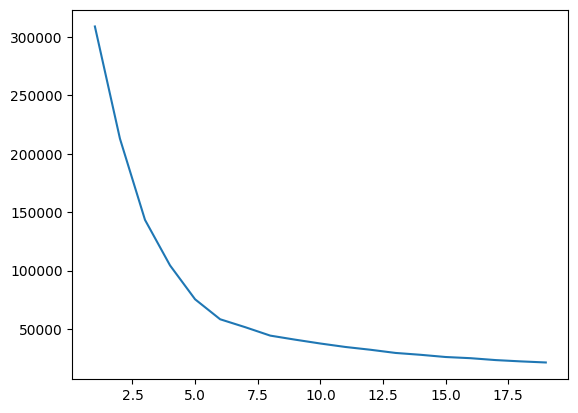

In [39]:
plt.plot(range(1,20), lst_inertias)

we see `minimum inertia` is when `cluster = 6`

we plot 6 clusters

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


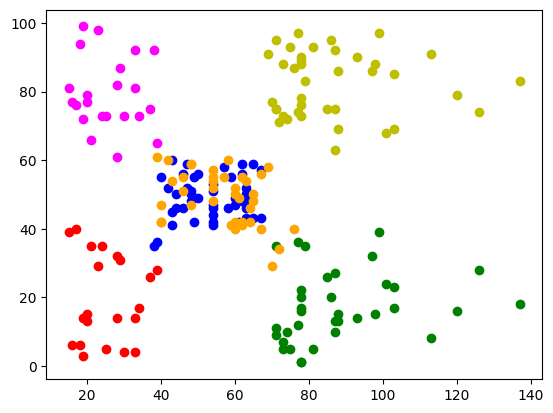

In [40]:
cls = KMeans(n_clusters=6)
preds = cls.fit_predict(df)
plt.scatter(df.iloc[preds == 0, 2], df.iloc[preds == 0, 3], color='r')
plt.scatter(df.iloc[preds == 1, 2], df.iloc[preds == 1, 3], color='y')
plt.scatter(df.iloc[preds == 2, 2], df.iloc[preds == 2, 3], color='b')
plt.scatter(df.iloc[preds == 3, 2], df.iloc[preds == 3, 3], color='g')
plt.scatter(df.iloc[preds == 4, 2], df.iloc[preds == 4, 3], color='orange')
plt.scatter(df.iloc[preds == 5, 2], df.iloc[preds == 5, 3], color='magenta')

we see that cluster which is in the `center graph splited to two clusters`!